1

In [52]:
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.datasets import make_blobs, make_circles
import matplotlib.pyplot as plt
import numpy as np
import random
from abc import ABC, abstractmethod
from collections import Counter

In [53]:
X, Y = make_blobs(n_samples = 100, n_features=2, centers=3, 
                  cluster_std = 2, random_state=124)

Text(0.5, 1.0, 'Initial data')

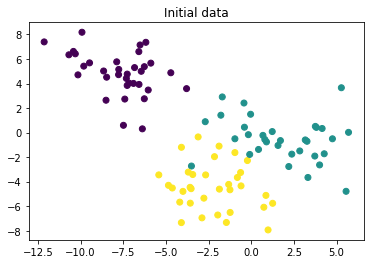

In [54]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('Initial data')

In [55]:
X_train = X[:70]
y_train = Y[:70]
X_test = X[70:]
y_test = Y[70:]

In [56]:
def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1 - x2) ** 2))

In [57]:
def accuracy(pred, real):
  counter = 0;
  for i in range(pred.shape[0]):
    if pred[i] == real[i]:
      counter += 1
  return counter / pred.shape[0]

In [58]:
class BaseEstimator(ABC):
  @abstractmethod
  def fit(self):
    pass

  @abstractmethod
  def predict(self):
    pass

In [59]:
class KNeighborsClassifier(BaseEstimator):

  def __init__(self, k=3, seed=42):
    self.k = k
    self.seed = seed

  def _euclidean_distance(self, obj, data):
    return np.sqrt(np.sum((obj - data) ** 2, axis=1))

  def _classify(self, obj):
    random.seed(self.seed)
    distances = self._euclidean_distance(obj, self.data)
    nearest_indexes = distances.argsort()[:self.k]
    candidates = self.labels[nearest_indexes]

    c = Counter(candidates)
    pred_label = random.choice(c.most_common())[0]
    return pred_label

  def fit(self, data, labels):
    self.data = data
    self.labels = labels

  def predict(self, predSample):
    preds = []

    for obj in predSample:
      preds.append(self._classify(obj))

    return np.array(preds)

In [60]:
def draw_class_border(clf, h=.03, cmap=plt.cm.coolwarm):
  x_min, x_max = np.min(clf.data[:,0]) - 1, np.max(clf.data[:,0]) + 1
  y_min, y_max = np.min(clf.data[:,1]) - 1, np.max(clf.data[:,1]) + 1

  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))

  Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
  Z = Z.reshape(xx.shape)

  plt.figure(figsize=(7,7))
  plt.contourf(xx, yy, Z, cmap=cmap, alpha=.5)
  plt.scatter(clf.data[:,0], clf.data[:,1], s=200, c = clf.labels, cmap=cmap)
  plt.title(f"k = {clf.k}")
  plt.show()

Predicted labels with 1 neighbors: [1 1 0 0 0 1 0 0 2 1 1 0 2 0 0 2 0 2 2 1 2 2 0 0 0 2 2 0 1 2]
Accuracy score with 1 neighbors is 0.9666666666666667


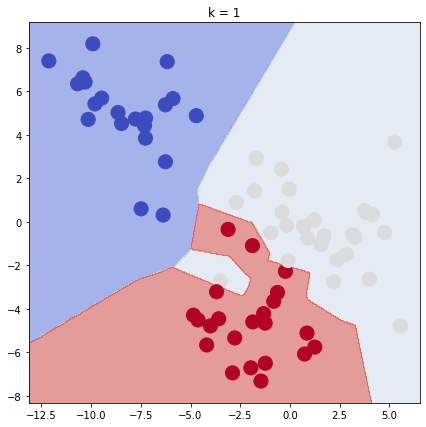

Predicted labels with 3 neighbors: [1 1 0 0 0 1 0 0 2 2 1 0 2 0 0 2 0 2 2 1 2 2 0 0 0 2 2 0 1 2]
Accuracy score with 3 neighbors is 1.0


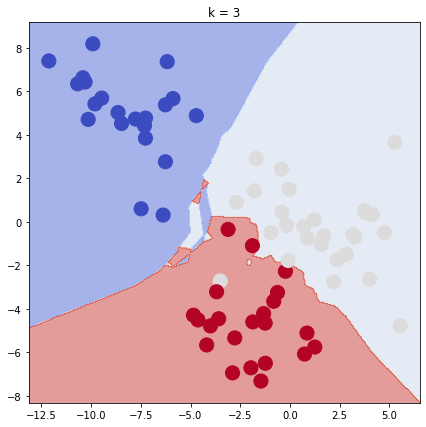

Predicted labels with 5 neighbors: [1 1 0 0 0 1 0 0 2 1 1 0 2 0 0 2 0 2 2 1 2 2 0 0 0 2 2 0 1 2]
Accuracy score with 5 neighbors is 0.9666666666666667


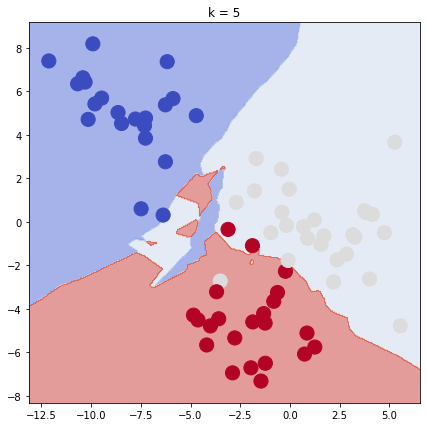

Predicted labels with 7 neighbors: [1 1 0 0 0 1 0 0 2 2 1 0 2 0 0 2 0 2 2 1 2 0 0 0 0 2 2 0 1 2]
Accuracy score with 7 neighbors is 0.9666666666666667


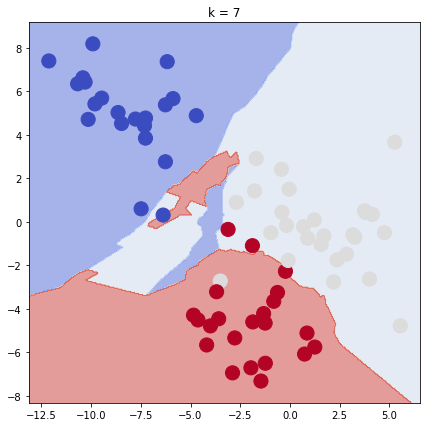

Predicted labels with 9 neighbors: [1 1 0 0 0 1 0 0 2 1 1 0 2 0 0 2 0 2 2 1 2 0 0 0 0 2 2 0 1 2]
Accuracy score with 9 neighbors is 0.9333333333333333


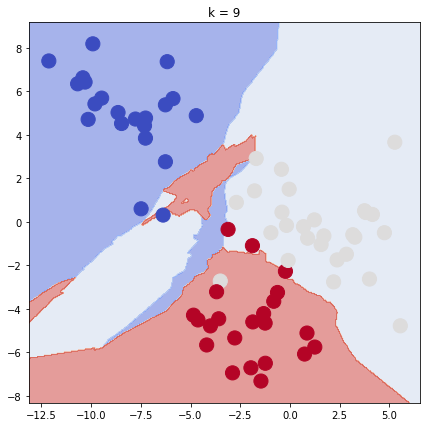

In [61]:
ks = [1, 3, 5, 7, 9]

for k in ks:
  knn = KNeighborsClassifier(k=k)
  knn.fit(X_train, y_train)

  y_pred = knn.predict(X_test)
  print(f"Predicted labels with {k} neighbors: {y_pred}")
  print(f"Accuracy score with {k} neighbors is {accuracy(y_pred, y_test)}")

  draw_class_border(knn, h=.05)

2

In [62]:
np.random.seed(28)

X_real = np.linspace(start=0, stop=5, num=100)
y_real = np.sin(X_real)

X_train = np.random.choice(X_real, size=10, replace=False)
y_train = np.sin(X_train)

In [63]:
class KNeighborsRegressor(BaseEstimator):

  def __init__(self, k=3, seed=42):
    self.k = k
    self.seed = seed

  def _euclidean_distance(self, obj, data):
    return np.sqrt(np.sum((obj - data) ** 2, axis=1))

  def _classify(self, obj):
    random.seed(self.seed)
    distances = self._euclidean_distance(obj, self.data)
    nearest_indexes = distances.argsort()[:self.k]
    candidates = self.target[nearest_indexes]
   
    pred_target = np.mean(candidates)

    return pred_target

  def fit(self, data, target):
    if len(data.shape) < 2:
      self.data = np.expand_dims(data, axis=1)
    else:
      self.data = data

    self.target = target

  def predict(self, predSample):
    preds = []

    for obj in predSample:
      preds.append(self._classify(obj))

    return np.array(preds)

In [64]:
def draw_graph():
  plt.title(f"k = {knn_reg.k}")
  plt.plot(X_real, y_real)
  plt.scatter(X_train, y_train, label='train')
  plt.plot(X_real, y_pred)
  plt.legend()
  plt.show()

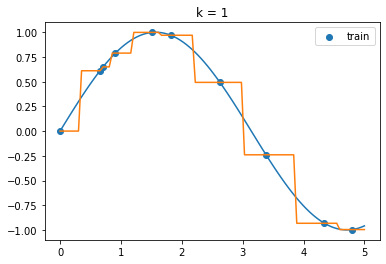

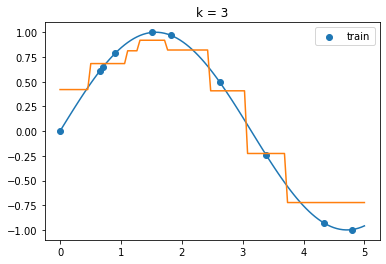

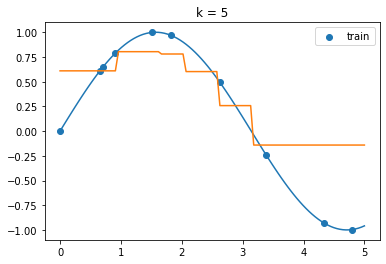

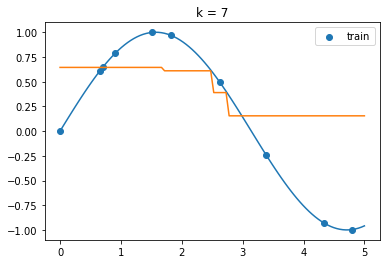

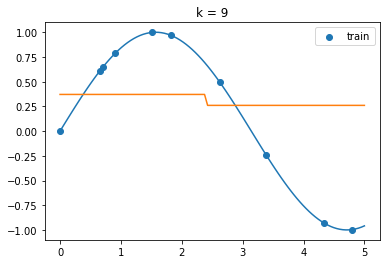

In [65]:
ks = [1, 3, 5, 7, 9]
for k in ks:
  knn_reg = KNeighborsRegressor(k=k)
  knn_reg.fit(X_train, y_train)
  y_pred = knn_reg.predict(X_real)

  draw_graph()